# Week 3: Acoustics

This week will explore the world of *acoustics*, which is a term that everyone knows, yet few people can define properly. A short definition can be that acoustics is the study of sound and its properties. The term originates from the Greek word *ἀκουστικός (akoustikos)*, meaning "of or for hearing, ready to hear." According to the [ANSI/ASA S1.1-2013](https://webstore.ansi.org/standards/asa/ansiasas112013) standard, acoustics typically have two meanings:

1. The science of sound, encompassing its production, transmission, and effects, both biological and psychological ([acoustics](https://en.wikipedia.org/wiki/Acoustics))
2. The qualities of a room that determine its auditory characteristics (which is the sub-discipline of [room acoustics](https://en.wikipedia.org/wiki/Room_acoustics)).

We will begin by considering acoustics broadly and then some of its subdisciplines, room acoustics, instrument acoustics, and electroacoustics. However, the latter three are just some of the many subdisciplines of acoustics, as seen in this overview.

![Lindsay's Wheel of Acoustics](https://upload.wikimedia.org/wikipedia/commons/8/82/Lindsay%27s_Wheel_of_Acoustics.svg)

*Figure: Lindsay's Wheel of Acoustics, illustrating the interdisciplinary nature of acoustics ([source](https://commons.wikimedia.org/wiki/File:Lindsay%27s_Wheel_of_Acoustics.svg)).*

## Fundamental Concepts

### Cause and effect

At its course, acoustics is about describing the cause and effect of sound. If we consider this systemically, we can think of the following chain from cause to effect: 

```mermaid
graph LR
    A[Cause] --> B[Generating mechanism]
    B --> C[Propagation]
    C --> D[Reception]
    D --> E[Effect]
```

The generating and receiving mechanisms in acoustics are typically achieved through *transduction*, the process of converting energy from one form to another (e.g., mechanical to electrical, or vice versa). Sound first propagates through a medium (such as air, water, or solids), and is then transduced again at the point of reception, enabling further processing or perception. This chain of transduction and propagation is fundamental to how sound is produced, transmitted, and experienced.

```mermaid
graph LR
    A[Cause] --> B[Transduction]
    B --> C[Propagation]
    C --> D[Transduction]
    D --> E[Effect]
```

For example, when a guitarist plucks a string (cause), the string vibrates and generates sound waves (generating mechanism). These sound waves travel through the air (propagation) and reach the human ear, where it is transduced and processed further. We will get back to the ear next week. 

The chain can be more complex. For example, the guitar sound can be picked up by a microphone, which converts the sound waves into electrical signals (reception/transduction). The electrical signals are then sent to a speaker, which converts them back into sound waves (effect/transduction), allowing the audience to hear the music.

### Vibrations

Vibrations are oscillatory motions of particles within a medium, which generate sound waves. These vibrations can be *periodic* (regular and repeating, as in musical notes) or *aperiodic* (irregular, as in noise). The nature of these vibrations determines the characteristics of the resulting sound, such as pitch and timbre. Vibrations are fundamental to the production and transmission of sound in acoustics. Let us begin by investigating some of the properties of sound waves.

```{note}
In the following, all the plots will be generated by Python code running inside the Jupyter Notebook that this text is written in. You can at any point in time check the source of the code. You don't need to understand the details of the code, but as you progress in your learning, it may help to be able to create such plots yourself.
```

In [4]:
# To make the rest of the code wor, we need to load some relevant Python libraries: 
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

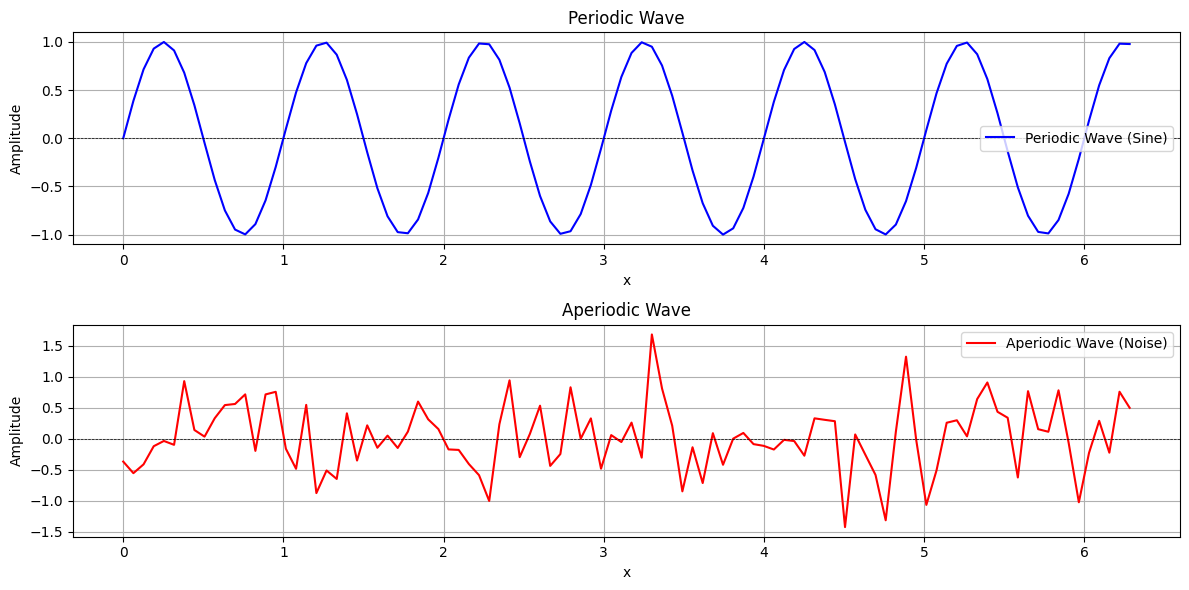

In [ ]:
# Define x for plotting with higher resolution
x = np.linspace(0, 2 * np.pi, 1000)

# Generate a periodic wave (sine wave)
periodic_wave = np.sin(2 * np.pi * x)

# Generate an aperiodic wave (random noise)
aperiodic_wave = np.random.normal(0, 0.5, len(x))

# Plot the periodic and aperiodic waves
plt.figure(figsize=(12, 6))

# Plot periodic wave
plt.subplot(2, 1, 1)
plt.plot(x, periodic_wave, label='Periodic Wave (Sine)', color='blue')
plt.title('Periodic Wave')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

# Plot aperiodic wave
plt.subplot(2, 1, 2)
plt.plot(x, aperiodic_wave, label='Aperiodic Wave (Noise)', color='red')
plt.title('Aperiodic Wave')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
x = np.linspace(0, 2 * np.pi, 100)  # Define x for plotting

# Generate a periodic wave (sine wave)
periodic_wave = np.sin(2 * np.pi * x)

# Generate an aperiodic wave (random noise)
aperiodic_wave = np.random.normal(0, 0.5, len(x))

# Plot the periodic and aperiodic waves
plt.figure(figsize=(12, 6))

# Plot periodic wave
plt.subplot(2, 1, 1)
plt.plot(x, periodic_wave, label='Periodic Wave (Sine)', color='blue')
plt.title('Periodic Wave')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

# Plot aperiodic wave
plt.subplot(2, 1, 2)
plt.plot(x, aperiodic_wave, label='Aperiodic Wave (Noise)', color='red')
plt.title('Aperiodic Wave')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### Longitudinal and Transverse Waves

Mechanical waves travel through a medium (such as air, water, or solids) by causing particles to vibrate. These waves are classified based on the direction of particle motion relative to the direction of wave propagation:

- **Longitudinal waves**: Particles oscillate parallel to the direction the wave travels. Sound waves in air are a common example.
- **Transverse waves**: Particles oscillate perpendicular to the direction of wave travel. Examples include waves on a string or surface water waves.

Understanding these wave types is fundamental to acoustics, as they determine how energy is transmitted through different materials.

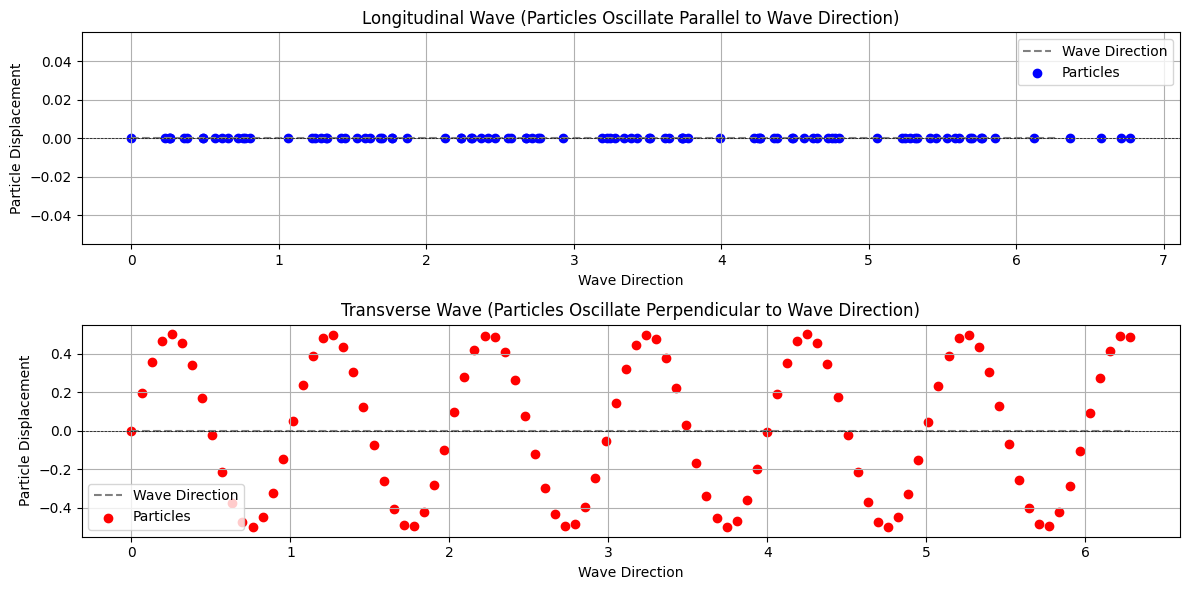

In [14]:
# Define parameters for the waves
x = np.linspace(0, 2 * np.pi, 100)
amplitude = 0.5
frequency = 1

# Generate waveforms
wave = np.sin(2 * np.pi * frequency * x)

# Create particle positions for longitudinal and transverse waves
longitudinal_x = x + amplitude * np.sin(2 * np.pi * frequency * x)
longitudinal_y = np.zeros_like(x)  # No vertical displacement

transverse_x = x  # No horizontal displacement
transverse_y = amplitude * np.sin(2 * np.pi * frequency * x)

# Create the figure
plt.figure(figsize=(12, 6))

# Plot longitudinal wave
plt.subplot(2, 1, 1)
plt.plot(x, np.zeros_like(x), '--', color='gray', label='Wave Direction')
plt.scatter(longitudinal_x, longitudinal_y, color='blue', label='Particles')
plt.title('Longitudinal Wave (Particles Oscillate Parallel to Wave Direction)')
plt.xlabel('Wave Direction')
plt.ylabel('Particle Displacement')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

# Plot transverse wave
plt.subplot(2, 1, 2)
plt.plot(x, np.zeros_like(x), '--', color='gray', label='Wave Direction')
plt.scatter(transverse_x, transverse_y, color='red', label='Particles')
plt.title('Transverse Wave (Particles Oscillate Perpendicular to Wave Direction)')
plt.xlabel('Wave Direction')
plt.ylabel('Particle Displacement')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### Frequency

Frequency refers to the number of complete oscillations or cycles a sound wave undergoes per second, measured in Hertz (Hz). It determines the audible *pitch* of a sound: higher frequencies produce higher-pitched sounds, while lower frequencies result in lower-pitched sounds. Frequency is a fundamental property in acoustics, influencing how we perceive and analyze sound.

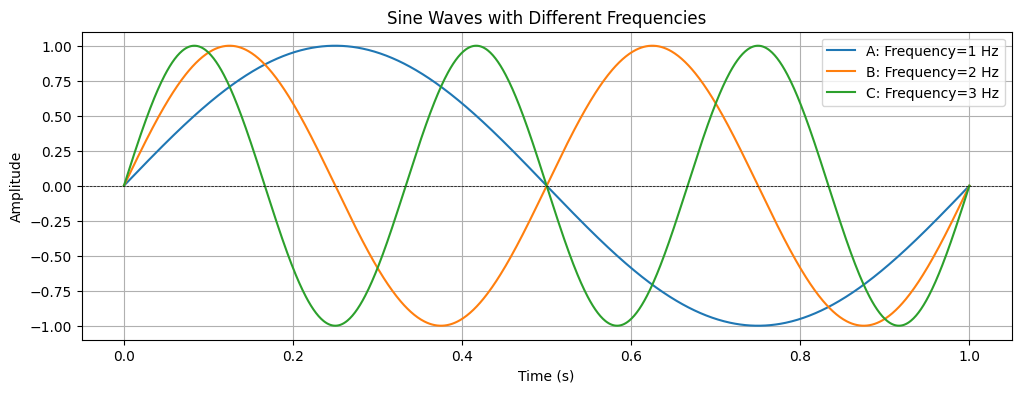

In [5]:
# Define parameters for the sine waves
time = np.linspace(0, 1, 1000)  # Time in seconds (0 to 1 second)
freq1, freq2, freq3 = 1, 2, 3  # Frequencies of the sine waves in Hz
wave1 = np.sin(2 * np.pi * freq1 * time)  # First sine wave
wave2 = np.sin(2 * np.pi * freq2 * time)  # Second sine wave
wave3 = np.sin(2 * np.pi * freq3 * time)  # Third sine wave

# Plot the sine waves
plt.figure(figsize=(12, 4))
plt.plot(time, wave1, label=f'A: Frequency={freq1} Hz')
plt.plot(time, wave2, label=f'B: Frequency={freq2} Hz')
plt.plot(time, wave3, label=f'C: Frequency={freq3} Hz')
plt.title('Sine Waves with Different Frequencies')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

### Phase

Describes the position of a point within a wave cycle, measured in degrees or radians. Phase differences between waves can lead to constructive or destructive interference.

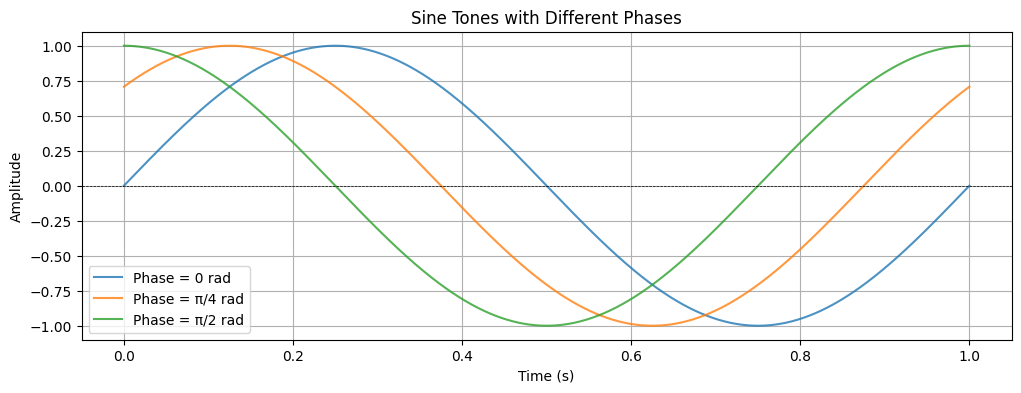

In [8]:
# Define the amplitude and frequency for the sine tones
amplitude = 1
frequency = 1  # Frequency in Hz

# Define the phases for the three sine tones
phase1 = 0  # 0 radians
phase2 = np.pi / 4  # 45 degrees in radians
phase3 = np.pi / 2  # 90 degrees in radians

# Convert x to time in seconds
time_in_seconds = x / (2 * np.pi * frequency)

# Generate the sine tones
sine1 = amplitude * np.sin(2 * np.pi * frequency * time_in_seconds + phase1)
sine2 = amplitude * np.sin(2 * np.pi * frequency * time_in_seconds + phase2)
sine3 = amplitude * np.sin(2 * np.pi * frequency * time_in_seconds + phase3)

# Plot the sine tones
plt.figure(figsize=(12, 4))
plt.plot(time_in_seconds, sine1, label='Phase = 0 rad', alpha=0.8)
plt.plot(time_in_seconds, sine2, label='Phase = π/4 rad', alpha=0.8)
plt.plot(time_in_seconds, sine3, label='Phase = π/2 rad', alpha=0.8)
plt.title('Sine Tones with Different Phases')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

In [1]:
# Define amplitude and frequency for the sine tones
amplitude = 1
frequency = 1  # Frequency in Hz

# Use x from previous cells
# Define two sine tones with opposite phases (0 and pi)
sine1 = amplitude * np.sin(x)
sine2 = amplitude * np.sin(x + np.pi)  # 180 degrees out of phase

# Sum of the two sine tones
sum_wave = sine1 + sine2

# Plot the two sine tones and their sum
plt.figure(figsize=(12, 4))
plt.plot(x, sine1, label='Sine Tone 1 (Phase = 0)', alpha=0.8)
plt.plot(x, sine2, label='Sine Tone 2 (Phase = π)', alpha=0.8)
plt.plot(x, sum_wave, label='Sum (Cancellation)', color='black', linewidth=2)
plt.title('Two Sine Tones Out of Phase (Cancellation)')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

NameError: name 'np' is not defined

### Amplitude

A sound wave's amplitude defines how "loud" it is.

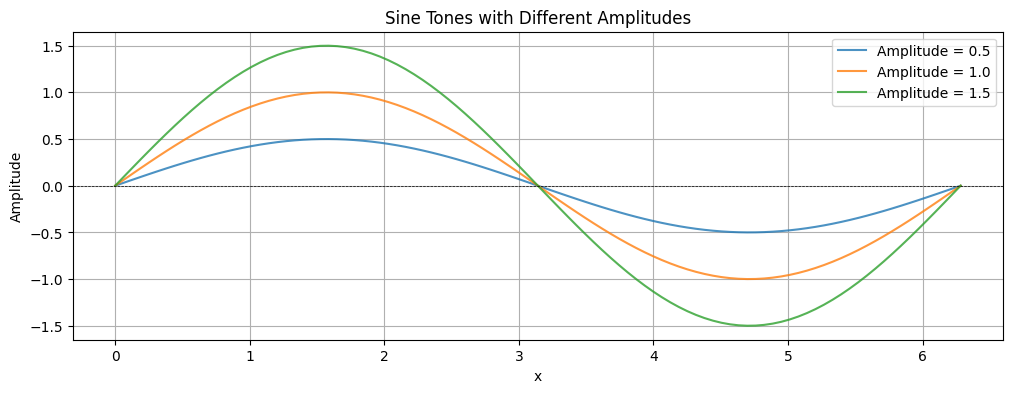

In [16]:
# Define amplitudes for the sine tones
amplitude1 = 0.5
amplitude2 = 1.0
amplitude3 = 1.5

# Generate the sine tones
sine1 = amplitude1 * np.sin(x)
sine2 = amplitude2 * np.sin(x)
sine3 = amplitude3 * np.sin(x)

# Plot the sine tones
plt.figure(figsize=(12, 4))
plt.plot(x, sine1, label='Amplitude = 0.5', alpha=0.8)
plt.plot(x, sine2, label='Amplitude = 1.0', alpha=0.8)
plt.plot(x, sine3, label='Amplitude = 1.5', alpha=0.8)
plt.title('Sine Tones with Different Amplitudes')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

```{exercise}
:label: Sine tones

Try out making one or more sine tones in [Glicol](https://glicol.org/tour#basicconnection). 
```

### Complex waves

Sound waves composed of multiple frequencies combined together. These waves can be decomposed into simpler sinusoidal components using Fourier analysis.

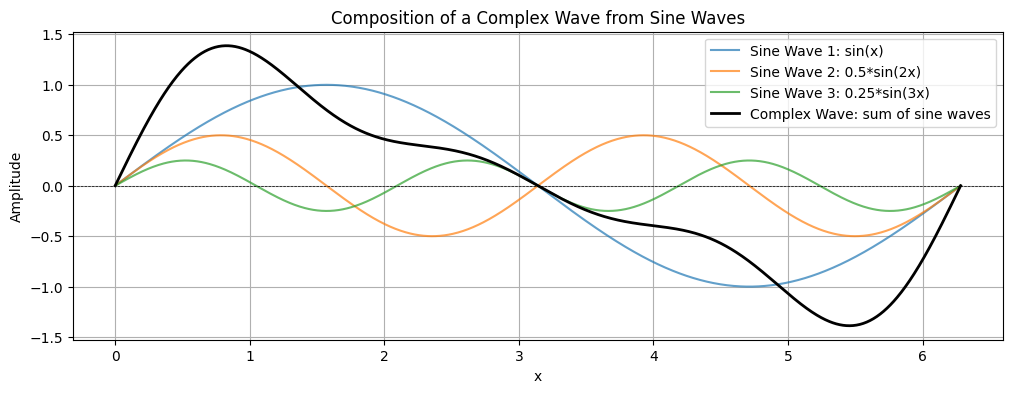

In [6]:
# Define parameters for the sine waves
x = np.linspace(0, 2 * np.pi, 1000)
wave1 = np.sin(x)  # First sine wave
wave2 = 0.5 * np.sin(2 * x)  # Second sine wave with half amplitude and double frequency
wave3 = 0.25 * np.sin(3 * x)  # Third sine wave with quarter amplitude and triple frequency

# Sum of the sine waves (complex wave)
complex_wave = wave1 + wave2 + wave3

# Plot the individual sine waves and the complex wave
plt.figure(figsize=(12, 4))
plt.plot(x, wave1, label='Sine Wave 1: sin(x)', alpha=0.7)
plt.plot(x, wave2, label='Sine Wave 2: 0.5*sin(2x)', alpha=0.7)
plt.plot(x, wave3, label='Sine Wave 3: 0.25*sin(3x)', alpha=0.7)
plt.plot(x, complex_wave, label='Complex Wave: sum of sine waves', color='black', linewidth=2)
plt.title('Composition of a Complex Wave from Sine Waves')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

### Beating waves

A phenomenon that occurs when two sound waves of slightly different frequencies interfere, creating a periodic variation in amplitude known as beats. [Glicol: Basic Connection](https://glicol.org/tour#basicconnection)

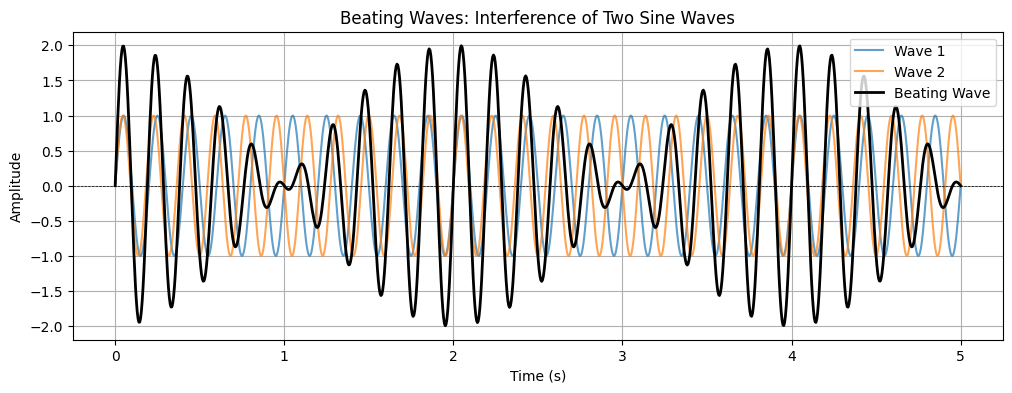

In [17]:
# Define parameters for the two sine waves
frequency1 = 5  # Frequency of the first wave in Hz
frequency2 = 5.5  # Frequency of the second wave in Hz
amplitude = 1  # Amplitude of the waves
time = np.linspace(0, 5, 1000)  # Time array from 0 to 5 seconds

# Generate the two sine waves
wave1 = amplitude * np.sin(2 * np.pi * frequency1 * time)
wave2 = amplitude * np.sin(2 * np.pi * frequency2 * time)

# Generate the resulting wave (superposition)
beating_wave = wave1 + wave2

# Plot the individual waves and the resulting wave
plt.figure(figsize=(12, 4))
plt.plot(time, wave1, label='Wave 1', alpha=0.7)
plt.plot(time, wave2, label='Wave 2', alpha=0.7)
plt.plot(time, beating_wave, label='Beating Wave', color='black', linewidth=2)
plt.title('Beating Waves: Interference of Two Sine Waves')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

- **Time vs frequency domain**: Two ways of representing sound. The time domain shows how a signal changes over time, while the frequency domain represents the signal's frequency components, often visualized using the Fourier transform.

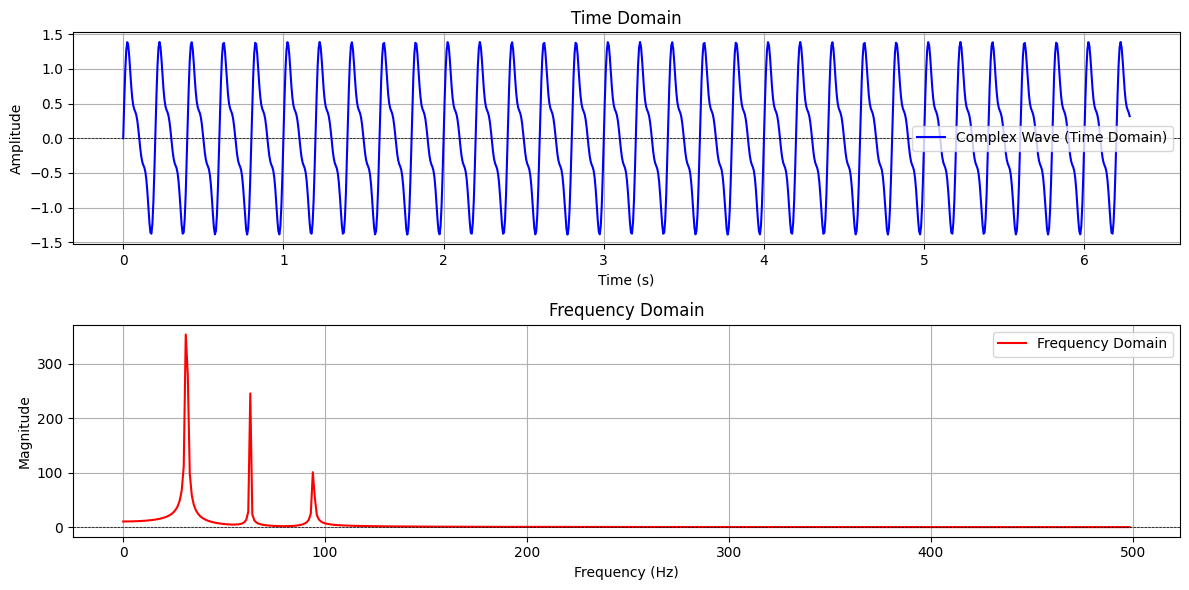

In [31]:
# Define parameters for the complex wave
x = np.linspace(0, 2 * np.pi, 1000)  # Time array with 1000 points
frequency1 = 5  # Frequency of the first wave in Hz
frequency2 = 10  # Frequency of the second wave in Hz
frequency3 = 15  # Frequency of the third wave in Hz
amplitude1 = 1  # Amplitude of the first wave
amplitude2 = 0.5  # Amplitude of the second wave
amplitude3 = 0.25  # Amplitude of the third wave

# Generate the complex wave as a sum of three sine waves
wave1 = amplitude1 * np.sin(2 * np.pi * frequency1 * x)
wave2 = amplitude2 * np.sin(2 * np.pi * frequency2 * x)
wave3 = amplitude3 * np.sin(2 * np.pi * frequency3 * x)
complex_wave = wave1 + wave2 + wave3  # Complex wave

# Compute the Fourier Transform of the complex wave
N = len(complex_wave)  # Number of samples
T = (x[1] - x[0]) / (2 * np.pi)  # Sampling period (time step)
frequencies = fftfreq(N, T)[:N // 2]  # Frequency components
fft_values = fft(complex_wave)[:N // 2]  # FFT values (only positive frequencies)

# Plot the time domain and frequency domain
plt.figure(figsize=(12, 6))

# Time domain plot
plt.subplot(2, 1, 1)
plt.plot(x, complex_wave, label='Complex Wave (Time Domain)', color='blue')
plt.title('Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

# Frequency domain plot
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_values), label='Frequency Domain', color='red')
plt.title('Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### Sound Pressure Level (SPL)

Sound Pressure Level (SPL) is a measure of the pressure variation caused by a sound wave. It is used in various fields, such as acoustics, audio engineering, and environmental noise monitoring, to assess sound levels and ensure compliance with safety standards. Understanding SPL is crucial for analyzing how sound behaves in different environments and its impact on human hearing.

It is expressed in decibels (dB), which is a logarithmic unit used to express the ratio of two values. 

The **3 dB Rule** says that a 3 dB increase in SPL corresponds to a doubling of the sound pressure, which also approximately doubles the perceived loudness. 

The **Inverse-Square Law** says that as the distance from the source doubles, the sound pressure decreases to one-fourth, resulting in a 6 dB reduction in SPL.

![Inverse Square Law](https://upload.wikimedia.org/wikipedia/commons/d/da/Inverse_square_law_mk.svg)

*Figure: Illustration of the Inverse-Square Law, showing how sound pressure decreases with distance (from [Wikipedia](https://commons.wikimedia.org/wiki/File:Inverse_square_law_mk.svg)).*

### Speed of sound

The rate at which sound waves travel through a medium. It depends on the medium's properties, such as density and elasticity:

| Medium       | Speed (m/s) |
|--------------|-------------|
| Air          | 343         |
| Helium       | 965         |
| Water        | 1481        |
| Glass        | 4540        |
| Iron         | 5120        |
| Diamond      | 12000       |

For more information, visit the [Wikipedia page on the speed of sound](https://en.wikipedia.org/wiki/Speed_of_sound).

### Noise

 
, including:

- **White noise**: Contains all frequencies at equal intensity. Sounds like static from a radio or TV.
- **Pink noise**: Has equal energy per octave, resulting in more low-frequency content. Examples include rainfall or wind.
- **Brownian noise**: Even more low-frequency emphasis than pink noise. Sounds like a deep rumble or distant thunder.
- **Blue noise**: Emphasizes higher frequencies. Rare in nature, sometimes used in dithering.
- **Grey noise**: Perceptually adjusted so all frequencies sound equally loud to the human ear.
- **Impulse noise**: Sudden, short bursts of sound, such as clicks or pops.

These noise types are used in audio testing, sound masking, and various scientific applications.

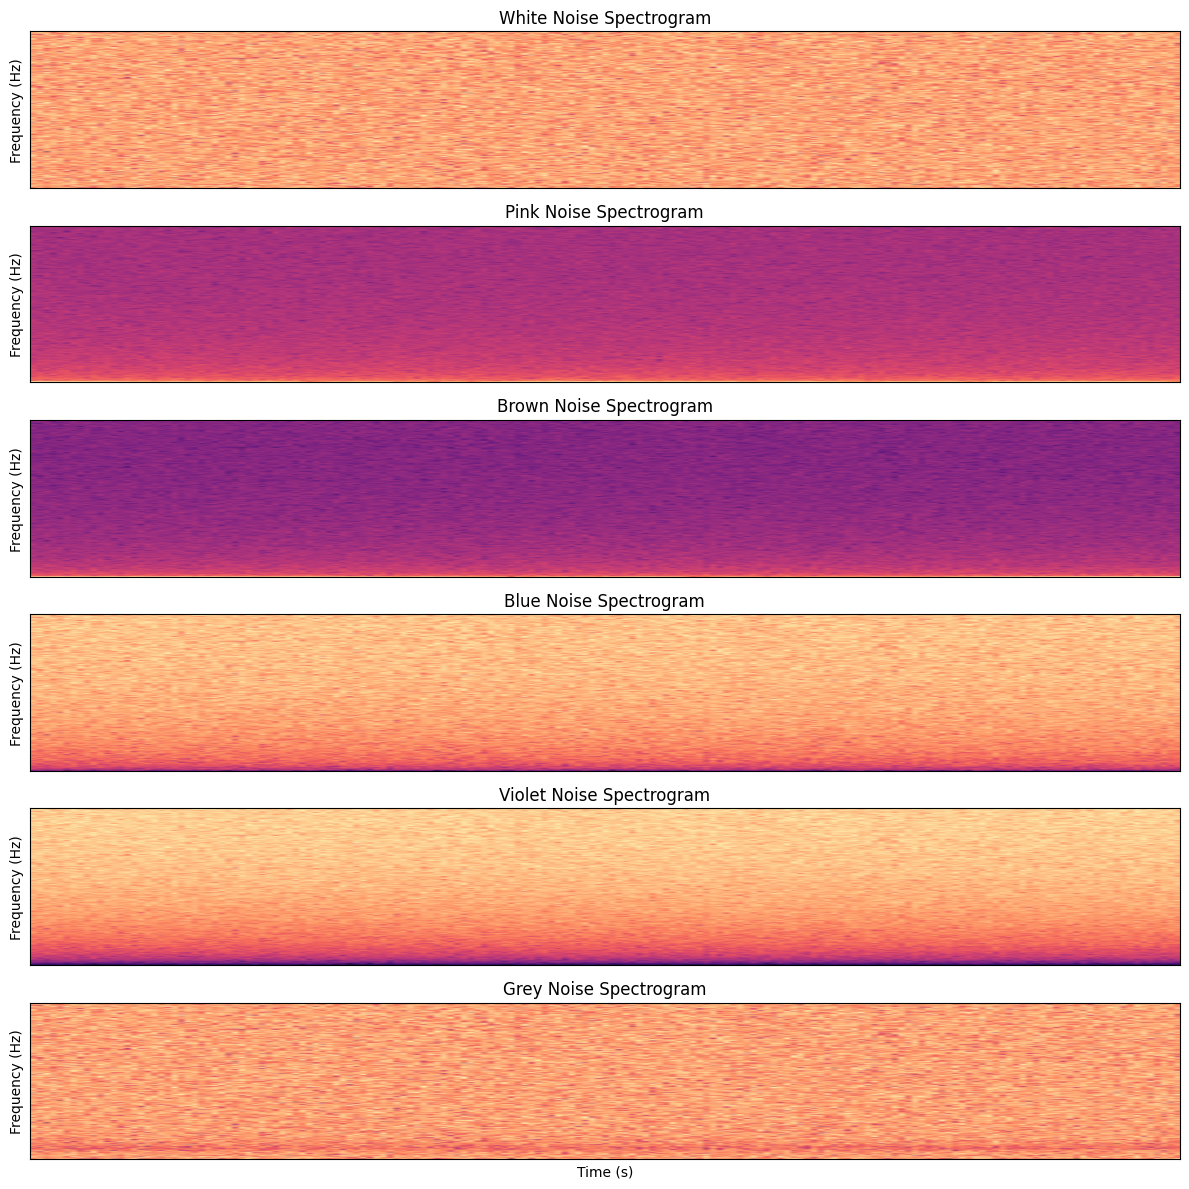

In [4]:
plt.figure(figsize=(12, 12))
for i, (name, noise) in enumerate(noises, 1):
    plt.subplot(6, 1, i)
    plt.specgram(noise, Fs=sampling_rate, NFFT=1024, noverlap=512, cmap='magma')
    plt.title(f'{name} Noise Spectrogram')
    plt.ylabel('Frequency (Hz)')
    plt.xticks([])
    plt.yticks([])
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()


## Digital Sound

*Sound* refers to the physical phenomenon of vibrations traveling through a medium (such as air, water, or solids) that can be heard when they reach a listener's ear. *Audio*, on the other hand, is the representation of sound in a format that can be recorded, processed, or reproduced, typically in digital or analog form. While sound exists naturally, audio is a human-made construct used to capture and manipulate sound for various purposes, such as communication, entertainment, or analysis.

*Digitization* is process of converting analog sound to digital using an Analog-to-Digital Converter (ADC).

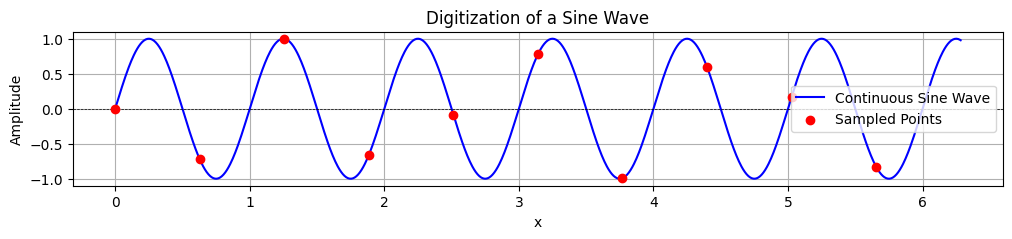

In [37]:
# Define parameters for the sine wave
frequency = 1  # Frequency in Hz
amplitude = 1  # Amplitude of the sine wave
sampling_rate = 10  # Sampling rate in Hz (samples per second)

# Generate the continuous sine wave
continuous_wave = amplitude * np.sin(2 * np.pi * frequency * x)

# Generate the sampled points
sampled_x = np.linspace(0, 2 * np.pi, sampling_rate, endpoint=False)
sampled_wave = amplitude * np.sin(2 * np.pi * frequency * sampled_x)

# Plot the continuous sine wave and its sampled points
plt.figure(figsize=(12, 2))
plt.plot(x, continuous_wave, label='Continuous Sine Wave', color='blue')
plt.scatter(sampled_x, sampled_wave, color='red', label='Sampled Points', zorder=5)
plt.title('Digitization of a Sine Wave')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

### Sampling rate

Defined by the **sampling theorem**, the sampling rate is the number of samples per second taken from a continuous signal to create a discrete signal. According to the [Nyquist–Shannon sampling theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem), the sampling rate must be at least twice the highest frequency present in the signal to accurately reconstruct it. This minimum rate is known as the [Nyquist Frequency](https://en.wikipedia.org/wiki/Nyquist_frequency).

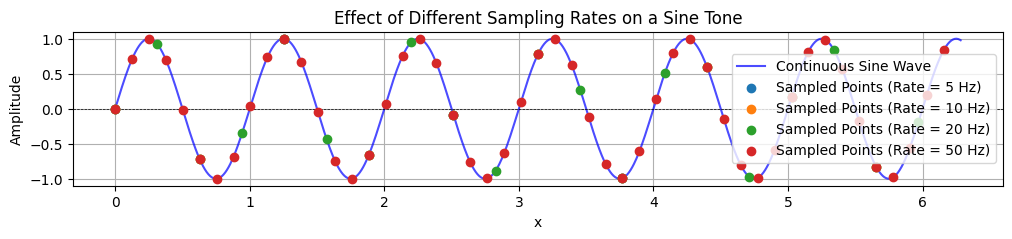

In [40]:
# Define parameters for the sine wave
frequency = 1  # Frequency in Hz
amplitude = 1  # Amplitude of the sine wave
sampling_rates = [5, 10, 20, 50]  # Different sampling rates in Hz

# Generate the continuous sine wave
continuous_wave = amplitude * np.sin(2 * np.pi * frequency * x)

# Create the figure
plt.figure(figsize=(12, 2))

# Plot the continuous sine wave
plt.plot(x, continuous_wave, label='Continuous Sine Wave', color='blue', alpha=0.7)

# Plot sampled points for each sampling rate
for i, rate in enumerate(sampling_rates):
    sampled_x = np.linspace(0, 2 * np.pi, rate, endpoint=False)
    sampled_wave = amplitude * np.sin(2 * np.pi * frequency * sampled_x)
    plt.scatter(sampled_x, sampled_wave, label=f'Sampled Points (Rate = {rate} Hz)', zorder=5)

plt.title('Effect of Different Sampling Rates on a Sine Tone')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

### Bit rate

The bit rate is the amount of data processed per second and can be thought of as the "resolution" of the digitized audio.

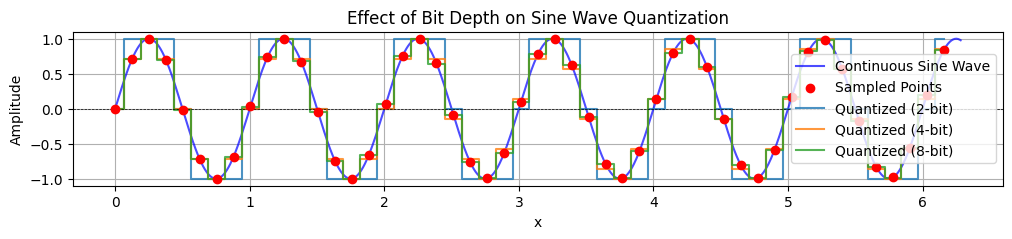

In [36]:
# Define parameters for the sine wave
frequency = 1  # Frequency in Hz
amplitude = 1  # Amplitude of the sine wave
sampling_rate = 50  # Sampling rate in Hz (samples per second)

# Generate the continuous sine wave
continuous_wave = amplitude * np.sin(2 * np.pi * frequency * x)

# Generate the sampled points
sampled_x = np.linspace(0, 2 * np.pi, sampling_rate, endpoint=False)
sampled_wave = amplitude * np.sin(2 * np.pi * frequency * sampled_x)

# Quantize the sampled wave at different bit depths
bit_depths = [2, 4, 8]  # Bit depths to demonstrate
quantized_waves = [np.round(sampled_wave * (2**(b-1) - 1)) / (2**(b-1) - 1) for b in bit_depths]

# Plot the continuous wave, sampled points, and quantized waves
plt.figure(figsize=(12, 2))

# Plot the continuous sine wave
plt.plot(x, continuous_wave, label='Continuous Sine Wave', color='blue', alpha=0.7)

# Plot the sampled points
plt.scatter(sampled_x, sampled_wave, color='red', label='Sampled Points', zorder=5)

# Plot quantized waves
for i, b in enumerate(bit_depths):
    plt.step(sampled_x, quantized_waves[i], where='mid', label=f'Quantized ({b}-bit)', alpha=0.8)

plt.title('Effect of Bit Depth on Sine Wave Quantization')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

- **Containers**: File containers are formats used to store digital audio data along with metadata, such as track information, album art, and more. Examples include [WAV](https://en.wikipedia.org/wiki/WAV), [AIFF](https://en.wikipedia.org/wiki/Audio_Interchange_File_Format), and [MP4](https://en.wikipedia.org/wiki/MPEG-4_Part_14). Containers can hold raw or compressed audio data.

- **Compression**: Compression formats reduce the file size of digital audio while maintaining quality to varying degrees. They can be **lossless** (e.g., [FLAC](https://en.wikipedia.org/wiki/FLAC), [ALAC](https://en.wikipedia.org/wiki/Apple_Lossless)) or **lossy** (e.g., [MP3](https://en.wikipedia.org/wiki/MP3), [AAC](https://en.wikipedia.org/wiki/Advanced_Audio_Coding)). Lossless compression preserves all audio data, while lossy compression removes some data to achieve smaller file sizes.

 and back using DAC (Digital-to-Analog Converter).

## Electro-Acoustics

Electro-Acoustics" refers to the field of study and technology that deals with the conversion between electrical signals and sound waves. It encompasses the design, analysis, and application of devices that perform this conversion, such as microphones, loudspeakers, headphones, and hearing aids.

This field combines principles from acoustics (the science of sound) and electronics to create systems that enable sound recording, reproduction, and transmission.

### Microphones
Microphones are devices that convert sound waves into electrical signals. They are categorized based on their design and working principles:

Dynamic Microphones:

Use a diaphragm attached to a coil of wire, placed within a magnetic field.
Sound waves move the diaphragm, generating an electrical signal.
Durable and good for high sound pressure levels (e.g., live performances).
Condenser Microphones:

Use a diaphragm placed close to a charged backplate, forming a capacitor.
Sound waves change the distance between the diaphragm and backplate, altering the capacitance and creating an electrical signal.
Sensitive and ideal for studio recordings.
Contact Microphones:

Detect vibrations directly from solid surfaces rather than air.
Often use piezoelectric materials to convert vibrations into electrical signals.
Commonly used for instruments like violins or guitars.

Microphones

- **Types**:
  - [Dynamic microphones](https://en.wikipedia.org/wiki/Microphone#Dynamic_microphones).
  - [Condenser microphones](https://en.wikipedia.org/wiki/Microphone#Condenser_microphones).
- **Applications**:
  - Recording environmental sounds.
  - Enhancing listening practices.


## Microphones

- Microphones and listening - Krause 2016
- softhearers vs loudspeakers


### Speakers
Speakers are devices that convert electrical signals into sound waves. They are categorized based on their application and design:

Standard speakers used in audio systems.
Use a diaphragm (cone) driven by an electromagnet to produce sound.
Designed for a wide range of frequencies.
Headphones:

Miniature speakers worn on or in the ears.
Provide a personal listening experience by delivering sound directly to the listener.
Actuators:

Devices that create vibrations to produce sound in unconventional ways.
Often used in haptic feedback systems or to turn surfaces (like tables or windows) into speakers.

### Signal processing

Signal Processing: Often involves amplifying, filtering, or modifying the electrical signals to improve sound quality or adapt it for specific purposes.



### Instrument Acoustics

- **Frequency range**: The range of frequencies produced by instruments.
- **Organology**: The study of musical instruments and their classification.

![Fundamentals of Instrument Acoustics](http://www.sebastianmerchel.de/Projects/Tactile%20Touchscreen/Pictures/fundamentels_instruments_big.jpg)

*Figure: Fundamentals of Instrument Acoustics ([Credit: Sebastian Merchel](http://www.sebastianmerchel.de/)).*


### Room Acoustics

- **Room size and shape**: Influences sound behavior.
- **Modes**:
    - Standing waves: [Online Calculator](https://amcoustics.com/tools/amroc?l=300&w=500&h=300&r60=0.6)
    - Flutter echo
- **Materials**: Affect sound reflection, absorption, and diffusion.
- **Sound alterations**:
    - Reflection
    - Diffraction
    - Diffusion
    - Absorption
- **Reverberation**:
    - T60: The time it takes for sound to decay by 60 dB.







## Spatial audio






## Citations

the following syntax: `` {cite}`holdgraf_evidence_2014` `` 

Here is the bibliography


```{bibliography}
```